#### Criar um modelo de regressão linear para prever qual será o investimento inicial necessário de uma franquia a partir da Taxa Anual cobrado pelo franqueador e avaliar se o modelo de regressão linear é um bom modelo para esse caso.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [3]:
# Importando a base de dados
base_dados = pd.read_csv('slr12.csv', sep=';')
base_dados.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [4]:
base_dados.shape

(36, 2)

In [5]:
# Verificando se há dados ausentes, nulos
base_dados.isnull().sum()

FrqAnual    0
CusInic     0
dtype: int64

In [6]:
# Estatistica dos dados
base_dados.describe()

,FrqAnual,CusInic
count,36.000000,36.000000
mean,1134.777778,1291.055556
std,158.583211,124.058038
min,700.000000,1050.000000
25%,1080.000000,1250.000000
50%,1162.500000,1277.500000
75%,1250.000000,1300.000000
max,1375.000000,1830.000000


In [7]:
# Definindo as varláveis
X = base_dados.iloc[0:, 0].values
y = base_dados.iloc[0:, 1].values

In [8]:
# Verificando a correlação entre as variáveis
correlacao = np.corrcoef(X, y)
print(correlacao)

[[1.         0.47700725]
 [0.47700725 1.        ]]


In [9]:
# Transformando X em mais uma coluna
X = X.reshape(-1, 1)

In [10]:
# Criar o modelo de treinamento
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [11]:
# Visualização dos coeficientes
# interceptação mostra onde a linha vai tocar no eixo y
# inclinação - indica quanto a variável y cresce quando a variável x cresce
modelo.intercept_
modelo.coef_
print(modelo.intercept_, modelo.coef_)

867.6042222620558 [0.37315794]


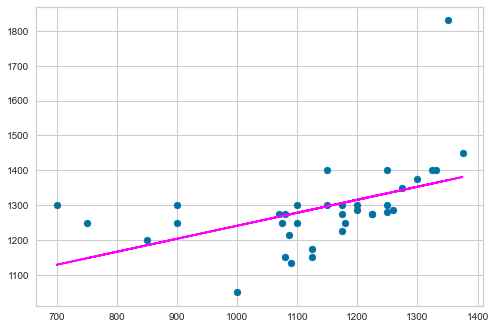

In [13]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color='magenta');

###### No gráfico acima, a linha vermelha é a linha de melhor ajuste. Cada ponto azul é a Taxa da Franquia Anual

In [14]:
# Previsão usando sklearn - Custo inicial do investimento baseado numa taxa de franquia de 1150
modelo.predict([[1150]])

array([1296.73584858])

##### O gráfico de residuais é bom para verificar se o modelo escolhido é bom.

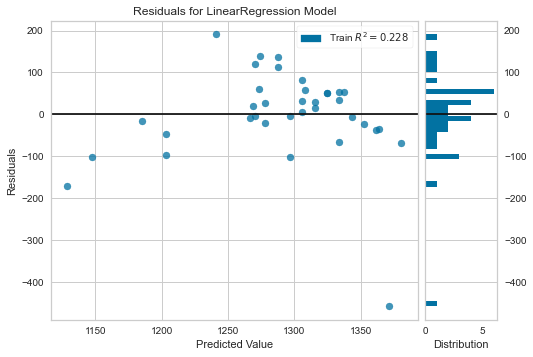

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
# gráfico para visualizar os residuais
visualResid = ResidualsPlot(modelo)
visualResid.fit(X, y)
visualResid.poof()

No grafico de residuos acima há 2 indícios que a regressão linear não é um bom modelo para o caso em questão:
<p>1. Histograma (Distribuiton) - nota-se que não é uma dist. normal, ela é assimétrica a esquerda</p>
<p>2. há poucos dados concentrados ao redor da linha </p>